# 1. Importing libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [50]:
#Checking for matplotlib version
matplotlib.__version__

'3.5.1'

In [51]:
# Ensure the charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [52]:
# Defining path
path = '/Users/mdiaz/Desktop/NWWS data/Data'

In [53]:
path

'/Users/mdiaz/Desktop/NWWS data/Data'

In [54]:
# Import data
df = pd.read_csv(os.path.join(path, 'Prepared', 'Clean NWWS.csv'))

In [55]:
# Data check 
df.head()

,state,id,county names,population_served,collection date,15dy percent change,percentile,current percentile levels
0,Hawaii,710,Kauai,10000,2022-12-27,5649.0,28,2
1,Maryland,547,Howard,270000,2022-12-27,-48.0,53,58
2,New York,426,Orange,6729,2022-12-27,-99.0,53,64
3,Oregon,932,Deschutes,92850,2022-12-27,-100.0,15,0
4,Oregon,956,Jackson,133708,2022-12-27,-70.0,20,0


# 2. Data consistency check

In [56]:
# Types
df.dtypes

state                          object
id                              int64
county names                   object
population_served               int64
collection date                object
15dy percent change           float64
percentile                      int64
current percentile levels       int64
dtype: object

In [57]:
# Check for missing values
df.isnull().sum() # No missing values!

state                         0
id                            0
county names                  0
population_served             0
collection date               0
15dy percent change           0
percentile                    0
current percentile levels     0
dtype: int64

In [58]:
# Locate duplicates
df_dups = df[df.duplicated()]

In [59]:
df_dups.shape # No duplicates

(1, 8)

In [60]:
#Mixed data types
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

During the cleaning process in the 1st data script, there were mixed data types for '15dy percentile change and 'percentile' columns with Nan or New Site, which were placeholders for sites that did not submit the test results or new. 

# 3. Exploring relationships

### Correlations

In [61]:
# Create a correlation matrix using pandas
df.corr()

,id,population_served,15dy percent change,percentile,current percentile levels
id,1.000000,0.002069,0.001397,0.216999,-0.184091
population_served,0.002069,1.000000,-0.018965,0.007297,0.097371
15dy percent change,0.001397,-0.018965,1.000000,-0.021210,-0.068637
percentile,0.216999,0.007297,-0.021210,1.000000,-0.277889
current percentile levels,-0.184091,0.097371,-0.068637,-0.277889,1.000000


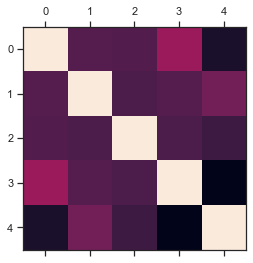

In [62]:
# Create a correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

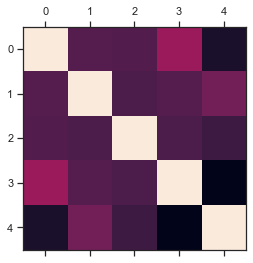

In [63]:
# Save visual to working directory
plt.matshow(df.corr())
plt.savefig("out.png")

In [64]:
#check current directory
cwd = os.getcwd()
cwd

'/Users/mdiaz/Desktop/NWWS data/Data/Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

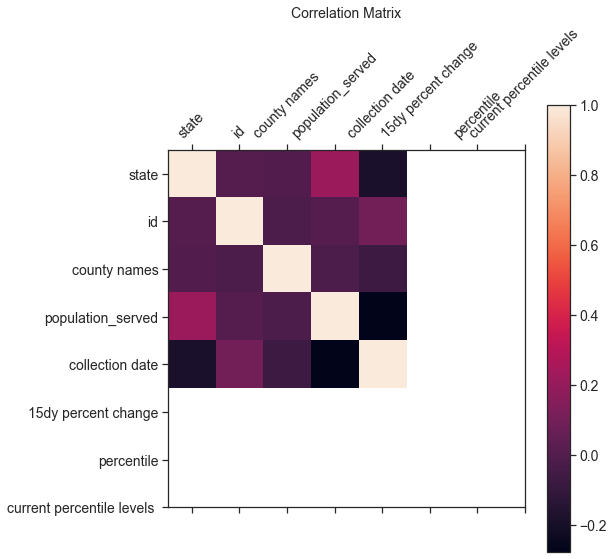

In [65]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

The coefficients in the plot mean that there are some strong relationships between 15dy percent change and current percentile levels.

### Creating correlations heatmaps with seaborn

In [66]:
df.columns

Index(['state', 'id', 'county names', 'population_served', 'collection date',
       '15dy percent change', 'percentile', 'current percentile levels '],
      dtype='object')

In [67]:
# Create a subset excluding the "Date" and "Unnamed" columns
sub = df[['state', 'county names', 'population_served', '15dy percent change','percentile', 'current percentile levels ']]

In [68]:
sub

,state,county names,population_served,15dy percent change,percentile,current percentile levels
0,Hawaii,Kauai,10000,5649.0,28,2
1,Maryland,Howard,270000,-48.0,53,58
2,New York,Orange,6729,-99.0,53,64
3,Oregon,Deschutes,92850,-100.0,15,0
4,Oregon,Jackson,133708,-70.0,20,0
...,...,...,...,...,...,...
841,Montana,Lewis And Clark,37125,192.0,59,60
842,Oregon,Josephine,37725,-100.0,11,0
843,West Virginia,Taylor,6071,-95.0,84,84
844,California,San Bernardino,890000,-23.0,78,78


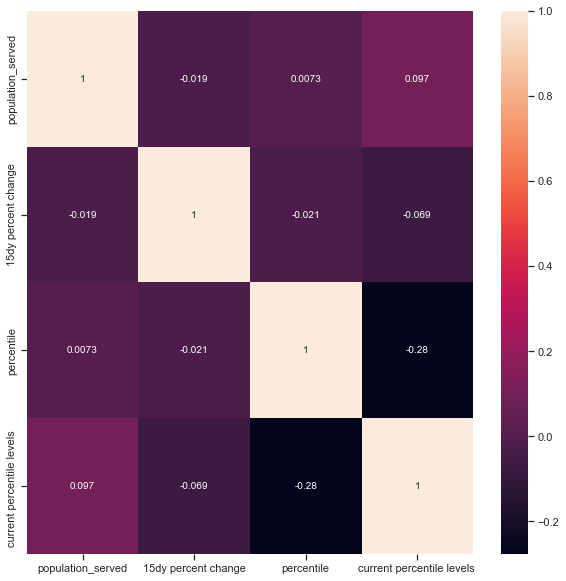

In [69]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplots

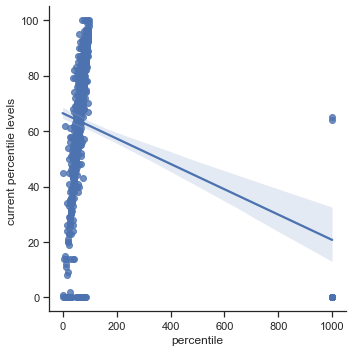

In [70]:
# Create a scatterplot for the "percentile" and "Current virus levels in wastewater by site (in %)" columns in seaborn
sns.lmplot(x = 'percentile', y = 'current percentile levels ', data = df)

### Categorical Plots

#Creating categorical variable that splits the "percentile" column into categories

<AxesSubplot:xlabel='percentile', ylabel='Count'>

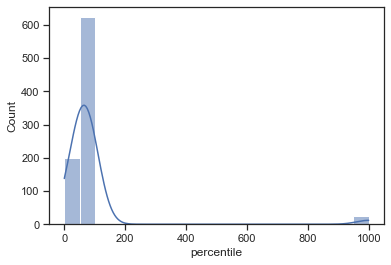

In [71]:
sns.histplot(df['percentile'], bins = 20, kde = True)

In [72]:
df.loc[df['percentile'] < -100, 'Percent change category'] = 'Large decrease'

In [73]:
df.loc[(df['percentile'] >= -99) & (df['percentile'] < -10), 'Percent change category'] = 'Decrease'

In [74]:
df.loc[(df['percentile'] >= -9) & (df['percentile'] < 9), 'Percent change category'] = 'Stable'

In [75]:
df.loc[(df['percentile'] >= 10) & (df['percentile'] < 99), 'Percent change category'] = 'Increase'

In [76]:
df.loc[df['percentile'] < 100, 'percentile'] = 'Large increase'

In [77]:
df['Percent change category'].value_counts(dropna = False)

Increase    814
NaN          26
Stable        6
Name: Percent change category, dtype: int64

In [78]:
df.columns

Index(['state', 'id', 'county names', 'population_served', 'collection date',
       '15dy percent change', 'percentile', 'current percentile levels ',
       'Percent change category'],
      dtype='object')

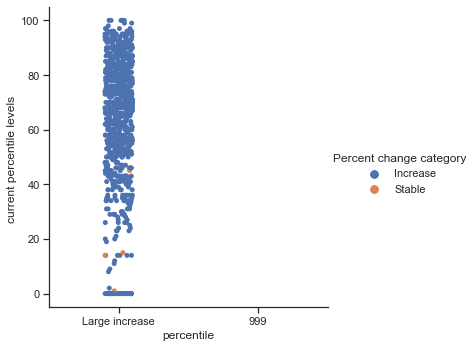

In [84]:
#Create a categorical plot in seaborn using the percent change categories created above
sns.set(style="ticks")
g = sns.catplot(x="percentile", y="current percentile levels ", hue="Percent change category", data=df)

In [85]:
#fig = g.get_figure()
g.savefig("out.png")

### Pair plots

In [81]:
# Keep only the variables you want to use in the pair plot
sub_2 = sub[['percentile', 'current percentile levels ']]

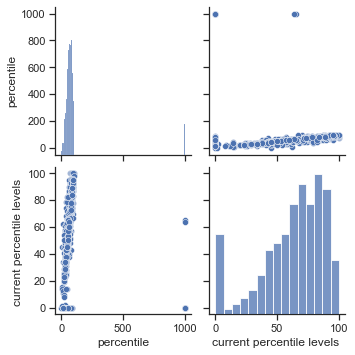

In [82]:
# Create a pair plot 
g = sns.pairplot(sub_2)

In [86]:
#fig = g.get_figure()
g.savefig("pairplot.png")